In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from math import sin, cos, exp, pi, sqrt
import math

(-0.1, 1.1)

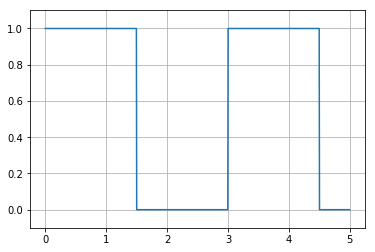

In [2]:
def step(x):
    return 0.0 if x%3>(3./2) else 1.0
x = np.linspace(0,5,1000)
y = [step(xx) for xx in x]
plt.plot(x,y,label='step')
plt.grid()
plt.ylim(-0.1,1.1)

In [49]:
def fourier_coeff(f,a,b,n,i,L):
    h = (b-a)/n
    ans = f(a,i,L)/2 + f(b,i,L)/2
    j = a+h
    while(j<b):
        ans+=f(j,i,L)
        j+=h
    ans = h*ans/L
    return ans
        
def fb(x,i,L):
    return step(x)*math.sin(i*math.pi*x/L)

def fa(x,i,L):
    return step(x)*math.cos(i*math.pi*x/L)
     
xs = np.linspace(0,5,100)

def coeff_generator(n,L):
    ai = [fourier_coeff(fa,0,3,100,i,L) for i in range(n+1)]
    bi = [fourier_coeff(fb,0,3,100,i,L) for i in range(n+1)]
    return(ai,bi)

ai = coeff_generator(3,1.5)[0]
bi = coeff_generator(3,1.5)[1]
print(ai)
print(bi)

[1.0, 0.019999999999999515, 8.659739592076221e-16, 0.019999999999999428]
[0.0, 0.6364103190754787, 1.554312234475219e-17, 0.2115778998681126]


In [57]:
def magic_wrapper(ai,bi):
    def magic(x,L):
        s = ai[0]/2
        for i,(a,b) in enumerate(zip(ai[1:],bi[1:])):
            s += a*math.cos((i+1)*math.pi*x/L)
            s += b*math.sin((i+1)*math.pi*x/L)
        return s
    return magic

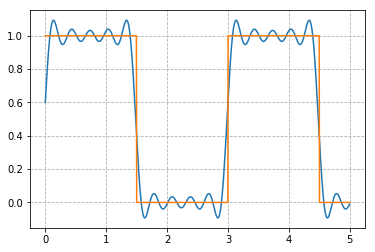

In [58]:
mw = magic_wrapper(ai,bi)
xs = np.linspace(0,5,1000)
fx = [mw(x,1.5) for x in xs]
plt.plot(xs,fx)
plt.plot(xs,[step(x) for x in xs])
plt.grid(ls='--')

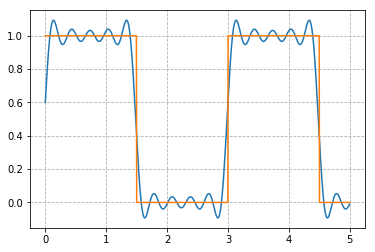

In [59]:
ai = coeff_generator(10,1.5)[0]
bi = coeff_generator(10,1.5)[1]

mw = magic_wrapper(ai,bi)
xs = np.linspace(0,5,1000)
fx = [mw(x,1.5) for x in xs]
plt.plot(xs,fx)
plt.plot(xs,[step(x) for x in xs])
plt.grid(ls='--')